In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Problem Set 7 Confusion Matrix, Overfitting and Validation

### Name : Gabriella Rivera

### Confusion Matrix

1.

In [333]:
tp = 77
tn = 4953
fp = 0
fn = 360

2.

The CM contains predicted values in rows.

3.

The CM has positive values first


4.

360 false positives and false negatives are reported

5.

|           | |**Predicted** | |
| -------|--------| ------------: | ------:|
|                |            | No. Firearm Related | No. Not Firearm Related|
| **Actual**| No. Firearm Related |        77        |           0            |
|           | No. Not Firearm Related  |   360       |         4953           |

6.

Negative Predictive Value (NPV) is the same as precision for negative outcomes.  "Se" stands for Sensitivity, also known as the True Positive Rate (TPR) or Recall.

7.

In [334]:
precision = tp / (tp + fp)
precision

1.0

In [335]:
recall = tp /(tp + fn)
recall

0.17620137299771166

In [336]:
f_score = 2 / ((1/precision) +(1/recall))
f_score

0.29961089494163423

### Overfitting and Validation

#### 2.1 Prepare Data

1.

In [337]:
heart = pd.read_csv('heart.csv.bz2', sep=',')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


2.

In [338]:
# Drop the 'output' column to create the design matrix X
X = heart.drop(columns=['output'])
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [339]:
# Generate dummy variables
X1 = pd.get_dummies(X, columns=["cp", "restecg"], drop_first=True, dtype=int)

X1.sample(5)

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,cp_1,cp_2,cp_3,restecg_1,restecg_2
207,60,0,150,258,0,157,0,2.6,1,2,3,0,0,0,0,0
15,50,0,120,219,0,158,0,1.6,1,0,2,0,1,0,1,0
204,62,0,160,164,0,145,0,6.2,0,3,3,0,0,0,0,0
154,39,0,138,220,0,152,0,0.0,1,0,2,0,1,0,1,0
77,59,1,140,221,0,164,1,0.0,2,0,2,1,0,0,1,0


In [340]:
y = heart['output']

3.

work = training

validation = test

In [341]:
from sklearn.model_selection import train_test_split

Xw, Xt, yw, yt = train_test_split(X1, y, test_size=0.2)

In [342]:
print("X_work shape:", Xw.shape)
print("X_train shape:", Xt.shape)
print("y_work shape:", yw.shape)
print("y_train shape:", yt.shape)

X_work shape: (242, 16)
X_train shape: (61, 16)
y_work shape: (242,)
y_train shape: (61,)


4.

In [343]:
import joblib

In [344]:
# Save the test data to a file
joblib.dump((Xt, yt), 'test_data.pkl')

['test_data.pkl']

In [345]:
# Delete the test data from memory
del Xt
del yt

In [346]:
# Check to confirm the variables are deleted
try:
    print(Xt)
except NameError:
    print("Xt is deleted")

Xt is deleted


5.

In [347]:
Xt, Xv, yt, yv = train_test_split(Xw, yw, test_size=0.2)
Xt.shape

(193, 16)

In [348]:
print('X training shape:', Xt.shape)
print('X validation shape:', Xv.shape)
print('y training shape:', yt.shape)
print('y validation shape:', yv.shape)

X training shape: (193, 16)
X validation shape: (49, 16)
y training shape: (193,)
y validation shape: (49,)


#### 2.2 Logistic Regression

1.

In [363]:
yt.value_counts()

output
1    100
0     93
Name: count, dtype: int64

Since the naive model predicts 1 for all instances:

- TP: Number of instances actually 1 (100).

- FN: 0 (since we never predict 0).

- FP: Number of instances actually 0 (93).

- TN: 0 (since we never predict 0).

In [371]:
tp = 100
tn = 0
fp = 93
fn = 0

In [372]:
confusion_matrix = [[tp, fn], [fp, tn]]
confusion_matrix

[[100, 0], [93, 0]]

In [373]:
precision = tp / (tp + fp)
precision

0.5181347150259067

In [374]:
recall = tp /(tp + fn) 
recall

1.0

In [375]:
f_score = 2 / ((1/precision) +(1/recall))
f_score

0.68259385665529

2.

In [376]:
m = LogisticRegression(max_iter=1000)

In [377]:
_ = m.fit(Xt, yt)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [351]:
yhatv = m.predict(Xv)

In [386]:
pd.crosstab(yv, yhatv)

col_0,0,1
output,,
0,17,2
1,4,26


In [381]:
from sklearn.metrics import precision_score

precision_score(yv, yhatv)

0.9285714285714286

In [354]:
from sklearn.metrics import recall_score

recall_score(yv, yhatv)

0.8666666666666667

In [356]:
from sklearn.metrics import f1_score

f1_score(yv, yhatv)

0.896551724137931

The precision score of the naive model is 40% lower than the sklearn model. The recall score of the sklearn model is 14% lower than the naive model (to be expected since the naive model contains 0 false negatives). The sklearn f1 score is about 20% higher than the naive model's. 

#### 2.3 Nearest Neighbors

1.

In [393]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [413]:
K = 20
f_scores_train = []
f_scores_val = []
for k in range(1, K):
     # Initialize the k-NN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    knn.fit(Xt, yt)
    
    # Predict on the training data
    y_train_pred = knn.predict(Xt)
    
    # Predict on the validation data
    y_val_pred = knn.predict(Xv)
    
    # Compute the F-score on the training data
    f1_train = f1_score(yt, y_train_pred)
    f_scores_train.append(f1_train)
    
    # Compute the F-score on the validation data
    f1_val = f1_score(yv, y_val_pred)
    f_scores_val.append(f1_val)

2.

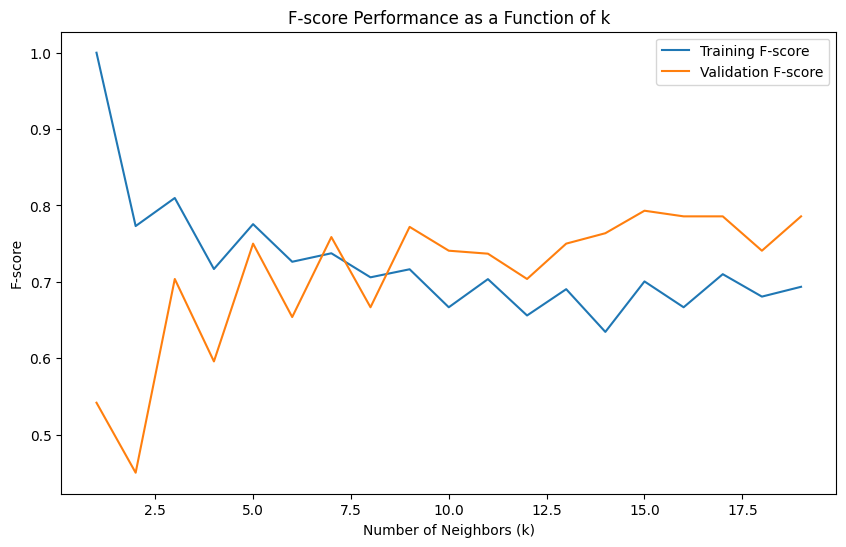

In [421]:
k_values = range(1,20)
# Plotting the F-score performance
plt.figure(figsize=(10, 6))

# Plot training F-scores
plt.plot(k_values, f_scores_train, label='Training F-score')

# Plot validation F-scores
plt.plot(k_values, f_scores_val, label='Validation F-score')

# Adding titles and labels
plt.title('F-score Performance as a Function of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F-score')
plt.legend()

# Show the plot
plt.show()


In [423]:
# Identify the best k
best_k = k_values[np.argmax(f_scores_val)]
best_k

15

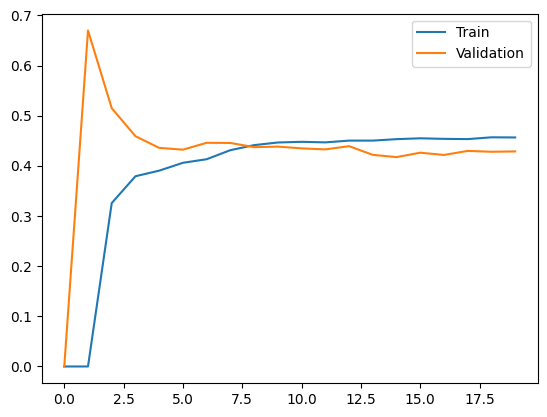

In [417]:
rmset = np.empty(K)
rmsev = np.empty(K)
for k in range(1, K): 
    m = KNeighborsRegressor(k).fit(Xt, yt)
    # Train the model on the training data
    yhatt = m.predict(Xt)
    rmset[k] = np.sqrt(np.mean((yt - yhatt)**2))
    yhatv = m.predict(Xv)
    rmsev[k] = np.sqrt(np.mean((yv - yhatv)**2))

_ = plt.plot(rmset, label = "Train")
_ = plt.plot(rmsev, label = "Validation")
_ = plt.legend()

3.

naive f-score = 0.68

logistic f-score = 0.90

The naive model f-score is the same as the nearest neighbors f-score. The logistic f-score is higher than the other two f-scores.

4.

       1. Overfitting: occurs at low k values (e.g., k = 1)
       2. Underfitting: occurs at larger k values (e.g., k = 20)
       3. Flattening: occurs at very high k values (e.g., k = 50)


The model's performance measure flattens out when k becomes very large because the classifier's decision boundary becomes too simple.

#### 2.4 Decision Trees

1.

In [428]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [434]:
# Initialize lists to store F-scores
max_depth_values = range(1, 11)
f_scores_train = []
f_scores_val = []

# Loop over different values of max depth
for max_depth in max_depth_values:
    # Initialize the Decision Tree model with max depth
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    # Train the model on the training data
    dt.fit(Xt, yt)
    
    # Predict on the training data
    y_train_pred = dt.predict(Xt)
    
    # Predict on the validation data
    y_val_pred = dt.predict(Xv)
    
    # Compute the F-score on the training data
    f1_train = f1_score(yt, y_train_pred)
    f_scores_train.append(f1_train)
    
    # Compute the F-score on the validation data
    f1_val = f1_score(yv, y_val_pred)
    f_scores_val.append(f1_val)
    

2.

Best Max Depth: 3 with F-score: 0.9438


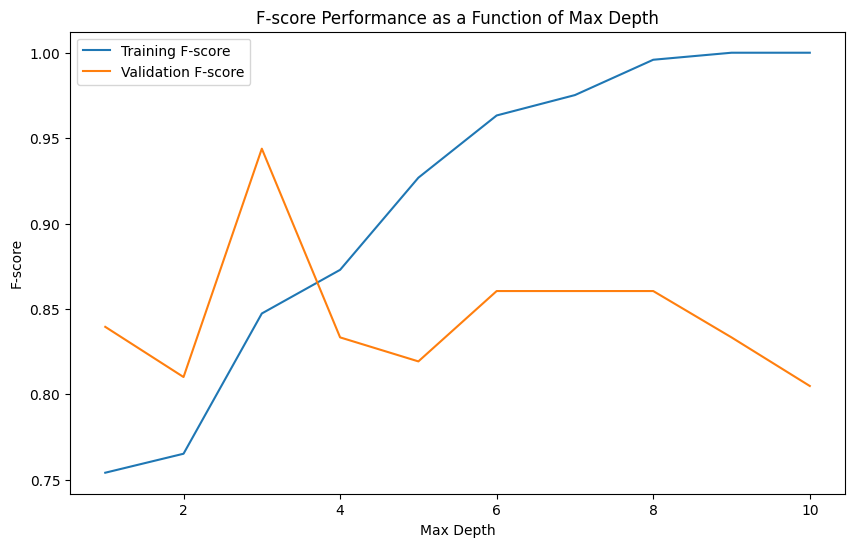

In [435]:
# Identify the best max depth
best_max_depth = max_depth_values[np.argmax(f_scores_val)]
best_f_score_val = max(f_scores_val)
print(f'Best Max Depth: {best_max_depth} with F-score: {best_f_score_val:.4f}')

# Plotting the F-score performance
plt.figure(figsize=(10, 6))

# Plot training F-scores
plt.plot(max_depth_values, f_scores_train, label='Training F-score')

# Plot validation F-scores
plt.plot(max_depth_values, f_scores_val, label='Validation F-score')

# Adding titles and labels
plt.title('F-score Performance as a Function of Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('F-score')
plt.legend()

# Show the plot
plt.show()

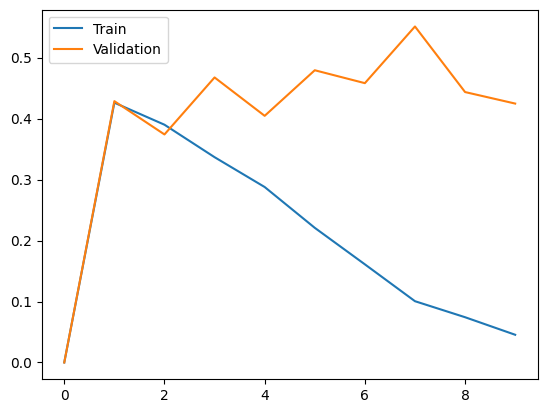

In [436]:
K = 10
rmset = np.zeros(K)
rmsev = np.zeros(K)
for k in range(1, K):
	m = DecisionTreeRegressor(max_depth = k)
	Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)
	_ = m.fit(Xt, yt)
	yhatt = m.predict(Xt)
	rmset[k] = np.sqrt(np.mean((yt - yhatt)**2))
	yhatv = m.predict(Xv)
	rmsev[k] = np.sqrt(np.mean((yv - yhatv)**2))


_ = plt.plot(rmset, label = "Train")
_ = plt.plot(rmsev, label = "Validation")
_ = plt.legend()

3. 

The k-value that gives the best f-score, 3, is much lower than that of the naive model or that of the logistical model.  

4.

Max depth values around 3, 6, and 7 show signs of overfitting as the training F-score is much higher than the validation F-score. Max depth values around 1 and 2 show signs of underfitting as both training and validation F-scores are relatively low.

### 2.5 Final Model Goodness

1.

Logistic is the best model in terms of validation F -score. It is more accurate than the naive model by 21%

2.

In [437]:
_ = m.fit(Xw, yw)

In [438]:
yhatw = m.predict(Xw)

3.

In [450]:
# Load the saved test data
test_data = joblib.load('test_data.pkl')
X_test = test_data[0]
y_test = test_data[1]

In [451]:
# Predict on the test data
y_test_pred = m.predict(X_test)

In [453]:
# Compute the F-score on the test data
f1_test = f1_score(y_test, y_test_pred)
f1_test

0.7714285714285715